### Reading the Modis level 2 cloudmask

http://modis-atmos.gsfc.nasa.gov/MOD35_L2/

In [1]:
%matplotlib inline
import h5py
import numpy as np
from matplotlib import pyplot as plt
from e582utils.data_read import download


mask_name='MYD35_L2.A2014125.2135.006.2014125184012.h5'
download(mask_name)

with h5py.File(mask_name,'r') as infile:
    cloud_mask=infile['mod35/Data Fields/Cloud_Mask'][...]

maskVals=cloud_mask[0,...].astype(np.uint8) #get the first byte

trying https://clouds.eos.ubc.ca/~phil/courses/atsc301/downloads/MYD35_L2.A2014125.2135.006.2014125184012.h5
writing to: MYD35_L2.A2014125.2135.006.2014125184012.h5

MYD35_L2.A2014125.2135.006.2014125184012.h5 already exists
and is 14650973 bytes
will not overwrite



There are 6 bytes in the cloudmask:

    "                                                                          \n",
    " Bit fields within each byte are numbered from the left:                  \n",
    " 7, 6, 5, 4, 3, 2, 1, 0.                                                  \n",
    " The left-most bit (bit 7) is the most significant bit.                   \n",
    " The right-most bit (bit 0) is the least significant bit.                 \n",
    "                                                                          \n",
    " bit field       Description                             Key              \n",
    " ---------       -----------                             ---              \n",
    "                                                                          \n",
    " 0               Cloud Mask Flag                      0 = Not determined  \n",
    "                                                      1 = Determined      \n",
    "                                                                          \n",
    " 2, 1            Unobstructed FOV Quality Flag        00 = Cloudy         \n",
    "                                                      01 = Uncertain      \n",
    "                                                      10 = Probably Clear \n",
    "                                                      11 = Confident Clear\n",
    "                 PROCESSING PATH                                          \n",
    "                 ---------------                                          \n",
    " 3               Day or Night Path                    0 = Night / 1 = Day \n",
    " 4               Sunglint Path                        0 = Yes   / 1 = No  \n",
    " 5               Snow/Ice Background Path             0 = Yes   / 1 = No  \n",
    " 7, 6            Land or Water Path                   00 = Water          \n",
    "                                                      01 = Coastal        \n",
    "                                                      10 = Desert         \n",
    "                                                      11 = Land           \n",
    " ____ END BYTE 1 _________________________________________________________\n",
    "                                                                          \n",
    " bit field       Description                             Key              \n",
    " ---------       -----------                             ---              \n",
    "                                                                          \n",
    "                 ADDITIONAL INFORMATION                                   \n",
    "                 ----------------------                                   \n",
    " 0               Non-cloud obstruction Flag              0 = Yes / 1 = No \n",
    " 1               Thin Cirrus Detected  (Solar)           0 = Yes / 1 = No \n",
    " 2               Shadow Found                            0 = Yes / 1 = No \n",
    " 3               Thin Cirrus Detected  (Infrared)        0 = Yes / 1 = No \n",
    " 4               Adjacent Cloud Detected **              0 = Yes / 1 = No \n",
    "                 ** Implemented Post Launch to                            \n",
    "                    Indicate cloud found within                           \n",
    "                    surrounding 1 km pixels *                             \n",
    "                                                                          \n",
    "                 1-km CLOUD FLAGS                                         \n",
    "                 ----------------                                         \n",
    " 5               Cloud Flag - IR Threshold               0 = Yes / 1 = No \n",
    " 6               High Cloud Flag - CO2 Test              0 = Yes / 1 = No \n",
    " 7               High Cloud Flag - 6.7 micron Test       0 = Yes / 1 = No \n",
    " ____ END BYTE 2 _________________________________________________________\n",
    "                                                                          \n",
    " bit field       Description                             Key              \n",
    " ---------       -----------                             ---              \n",
    "                                                                          \n",
    " 0               High Cloud Flag - 1.38 micron Test      0 = Yes / 1 = No \n",
    " 1               High Cloud Flag - 3.7-12 micron Test    0 = Yes / 1 = No \n",
    " 2               Cloud Flag - IR Temperature             0 = Yes / 1 = No \n",
    "                              Difference                                  \n",
    " 3               Cloud Flag - 3.7-11 micron Test         0 = Yes / 1 = No \n",
    " 4               Cloud Flag - Visible Reflectance Test   0 = Yes / 1 = No \n",
    " 5               Cloud Flag - Visible Reflectance        0 = Yes / 1 = No \n",
    "                              Ratio Test                                  \n",
    " 6               Cloud Flag - NDVI Final Confidence      0 = Yes / 1 = No \n",
    "                              Confirmation Test                           \n",
    " 7               Cloud Flag - Night 7.3-11 micron Test   0 = Yes / 1 = No \n",
    " ____ END BYTE 3 _________________________________________________________\n",
    "                                                                          \n",
    " bit field       Description                             Key              \n",
    " ---------       -----------                             ---              \n",
    "                                                                          \n",
    "                 ADDITIONAL TESTS                                         \n",
    "                 ----------------                                         \n",
    " 0               Cloud Flag - Spare                      0 = Yes / 1 = No \n",
    " 1               Cloud Flag - Spatial Variability        0 = Yes / 1 = No \n",
    " 2               Final Confidence Confirmation Test      0 = Yes / 1 = No \n",
    " 3               Cloud Flag - Night Water                0 = Yes / 1 = No \n",
    "                              Spatial Variability                         \n",
    " 4               Suspended Dust Flag                     0 = Yes / 1 = No \n",
    "                                                                          \n",
    " 5-7             Spares                                                   \n",
    " ____ END BYTE 4 _________________________________________________________\n",
    "                                                                          \n",
    " bit field       Description                             Key              \n",
    " ---------       -----------                             ---              \n",
    "                                                                          \n",
    "                 250-m Cloud Flag - Visible Tests                         \n",
    "                 --------------------------------                         \n",
    " 0               Element(1,1)                            0 = Yes / 1 = No \n",
    " 1               Element(1,2)                            0 = Yes / 1 = No \n",
    " 2               Element(1,3)                            0 = Yes / 1 = No \n",
    " 3               Element(1,4)                            0 = Yes / 1 = No \n",
    " 4               Element(2,1)                            0 = Yes / 1 = No \n",
    " 5               Element(2,2)                            0 = Yes / 1 = No \n",
    " 6               Element(2,3)                            0 = Yes / 1 = No \n",
    " 7               Element(2,4)                            0 = Yes / 1 = No \n",
    " ____ END BYTE 5 _________________________________________________________\n",
    "                                                                          \n",
    " bit field       Description                             Key              \n",
    " ----------      -----------                             ---              \n",
    "                                                                          \n",
    " 0               Element(3,1)                            0 = Yes / 1 = No \n",
    " 1               Element(3,2)                            0 = Yes / 1 = No \n",
    " 2               Element(3,3)                            0 = Yes / 1 = No \n",
    " 3               Element(3,4)                            0 = Yes / 1 = No \n",
    " 4               Element(4,1)                            0 = Yes / 1 = No \n",
    " 5               Element(4,2)                            0 = Yes / 1 = No \n",
    " 6               Element(4,3)                            0 = Yes / 1 = No \n",
    " 7               Element(4,4)                            0 = Yes / 1 = No \n",
    " ____ END BYTE 6 _________________________________________________________\n" ;


#### getting individual bits using a bitmask

Suppose we want to read the two bits 6 and 7 from the first word of the mask variable

1) create a mask with 1 in position 6 and 7 and 0 in bits 0-5

2) apply the mask with bitwise_and to keep only bits 6 and 7

3) shift bits 6 and 7 to the right 5 places and read them as bits 0 and 1

The result will be the land/sea cloudmask:

    " 7, 6            Land or Water Path                   00 = Water          \n",
    "                                                      01 = Coastal        \n",
    "                                                      10 = Desert         \n",
    "                                                      11 = Land           \n",
    " ____ END BYTE 1 _________________________________________________________\n",

### so loop through the first byte, getting the two bits starting at bit 6

In [2]:
def bits_stripping(bit_start,bit_count,value):
    bitmask=pow(2,bit_start+bit_count)-1
    return np.right_shift(np.bitwise_and(value,bitmask),bit_start)

landmask=np.empty_like(maskVals)
nrows,ncols=landmask.shape
for i in range(nrows):
    for j in range(ncols):
        landmask[i,j]=bits_stripping(6,2,maskVals[i,j])

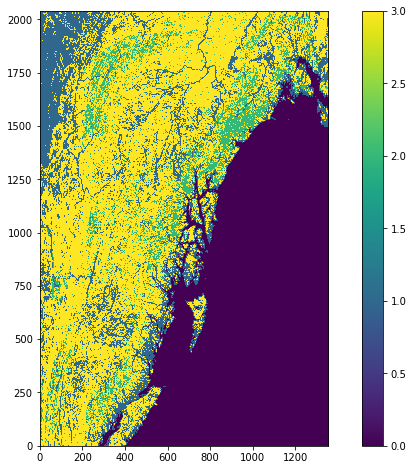

In [4]:
plt.close('all')        
fig,ax=plt.subplots(1,1,figsize=(12,8))
cs=ax.imshow(landmask,origin='lower')
plt.colorbar(cs);